In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer

from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, auc, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('SMSSpamCollection',delimiter='\t',header=None,)

In [3]:
df

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df[0].value_counts()

ham     4825
spam     747
Name: 0, dtype: int64

In [5]:
df[0] = df[0].replace(['ham','spam'],[0,1])

In [6]:
df

,0,1
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [7]:
from bs4 import BeautifulSoup
# https://stackoverflow.com/a/47091490/4084039
import re #regular expression

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [8]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [9]:
# Combining all the above stundents 
import nltk
sno = nltk.stem.SnowballStemmer('english')
from tqdm import tqdm
preprocessed_text = []
# tqdm is for printing the status bar
for sentance in tqdm(df[1].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance =sno.stem(sentance) #snoball stemmer
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    preprocessed_text.append(sentance.strip())

100%|█████████████████████████████████████| 5572/5572 [00:02<00:00, 2588.69it/s]


In [10]:
preprocessed_text

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah not think goes usf lives around though',
 'freemsg hey darling week no word back would like fun still tb ok xxx std chgs send rcv',
 'even brother not like speak treat like aids patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press copy friends callertun',
 'winner valued network customer selected receivea prize reward claim call claim code valid hours',
 'mobile months u r entitled update latest colour mobiles camera free call mobile update co free',
 'gonna home soon not want talk stuff anymore tonight k cried enough today',
 'six chances win cash pounds txt send cost tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim no c www dbuk net lccltd 

In [11]:

df.rename(columns={df.columns[0]: 'result'}, inplace=True)
df

,result,1
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
x = df[1]
y = df.result
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.4, stratify=y, random_state=0)


In [13]:
x_cv, x_test, y_cv, y_test = train_test_split(x_test,y_test,test_size=.5, stratify=y_test,random_state=0)

In [14]:
x_train

687     Every King Was Once A Crying Baby And Every Gr...
3849    Can you plz tell me the ans. BSLVYL sent via f...
3401    As a valued customer, I am pleased to advise y...
15      XXXMobileMovieClub: To use your credit, click ...
683                                Is xy going 4 e lunch?
                              ...                        
1613    RT-KIng Pro Video Club>> Need help? info@ringt...
4547    Never try alone to take the weight of a tear t...
1235    Hello-/@drivby-:0quit edrunk sorry iff pthis m...
1798           Can i get your opinion on something first?
1454                              Stupid.its not possible
Name: 1, Length: 3343, dtype: object

In [15]:
vectorizer = TfidfVectorizer(min_df=4,ngram_range=(1,3), max_features=10000)
x_train= pd.DataFrame(vectorizer.fit_transform(x_train.values).toarray(), index=x_train.index)
x_test= pd.DataFrame(vectorizer.transform(x_test.values).toarray(), index=x_test.index)
x_cv= pd.DataFrame(vectorizer.transform(x_cv.values).toarray(), index=x_cv.index)

In [16]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,3751,3752,3753,3754,3755,3756,3757,3758,3759,3760
687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1 94.25493716337523
2 92.36983842010773
3 92.36983842010773
4 91.20287253141831
5 91.20287253141831
6 90.12567324955117
7 90.12567324955117
8 89.31777378815082
9 89.31777378815082
10 87.88150807899461
11 87.88150807899461
12 86.983842010772
13 87.07360861759426
14 86.80430879712748
15 86.89407540394973
16 86.80430879712748
17 86.80430879712748
18 86.71454219030521
19 86.71454219030521
20 86.62477558348294
21 91.74147217235189
22 91.47217235188509
23 92.99820466786356
24 92.54937163375224
25 94.16517055655295
26 93.44703770197486
27 94.25493716337523
28 93.71633752244165
29 94.43447037701975
30 93.98563734290843
31 94.7935368043088
32 94.16517055655295
33 95.06283662477558
34 94.61400359066428
35 95.2423698384201
36 94.88330341113105
37 95.51166965888689
38 95.15260323159784
39 95.15260323159784
40 94.70377019748653
41 95.2423698384201
42 95.06283662477558
43 95.15260323159784
44 94.88330341113105
45 95.2423698384201
46 95.15260323159784
47 95.51166965888689
48 95.15260323159784
49 95.3

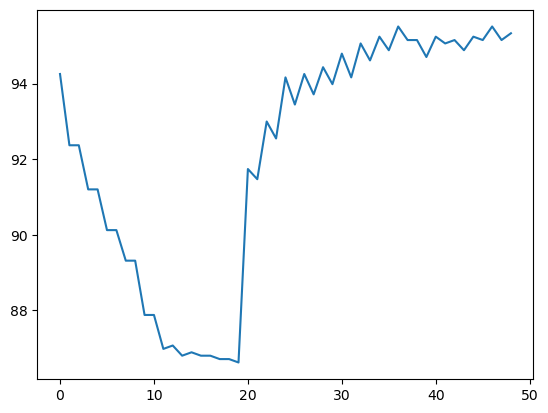

In [17]:
# we are doing hyper parameter tuning to test the improvement after scaling
from sklearn.neighbors import KNeighborsClassifier
lis =[]
for i in range (1,50):
    model = KNeighborsClassifier(i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_cv)
    lis.append(accuracy_score(y_cv, y_pred)*100)
    print(i, accuracy_score(y_cv, y_pred)*100)
plt.plot(lis)

In [18]:
from sklearn.linear_model import LogisticRegression  

model5 = LogisticRegression(random_state=0)
model5.fit(x_train,y_train)
y_pred = model5.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.967713004484305
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

[[965   0]
 [ 36 114]]


In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [.01,.05,.07,0.1, .2,.5,.7,1,1.5,2,5,7, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression model
model = LogisticRegression(random_state=0)

# Perform grid search cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best model and its predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Print evaluation metrics
print("Best parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.97847533632287
Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion matrix:
[[963   2]
 [ 22 128]]


In [24]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.callbacks import  EarlyStopping

learning_rate = 0.01
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(128*4, kernel_initializer='he_normal', activation='relu'),

    Dense(128*2, kernel_initializer='he_normal', activation='relu'),
#     Dropout(.3),
    Dense(128, kernel_initializer='he_normal', activation='relu'),
#     Dropout(.3),
    Dense(128, kernel_initializer='he_normal', activation='relu'),
#     Dropout(.3),
    Dense(64, kernel_initializer='he_normal', activation='relu'),
#     Dropout(.3),     
    Dense(32, kernel_initializer='he_normal', activation='relu'),
      
    Dense(1, kernel_initializer='he_normal', activation='linear')

  ])
    
  return model
# build the model
model = build_model_using_sequential()
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train.values, 
    y_train.values, 
    epochs=50, 
    batch_size=64,
    validation_data=(x_cv, y_cv),
    callbacks=[early_stopping_callback]
)

Epoch 1/50
53/53 [==============================] - 8s 61ms/step - loss: 0.0225 - mean_squared_logarithmic_error: 0.0223 - val_loss: 0.0080 - val_mean_squared_logarithmic_error: 0.0080
Epoch 2/50
53/53 [==============================] - 3s 52ms/step - loss: 0.0035 - mean_squared_logarithmic_error: 0.0035 - val_loss: 0.0057 - val_mean_squared_logarithmic_error: 0.0057
Epoch 3/50
53/53 [==============================] - 3s 52ms/step - loss: 0.0022 - mean_squared_logarithmic_error: 0.0021 - val_loss: 0.0056 - val_mean_squared_logarithmic_error: 0.0055
Epoch 4/50
53/53 [==============================] - 3s 55ms/step - loss: 0.0017 - mean_squared_logarithmic_error: 0.0017 - val_loss: 0.0053 - val_mean_squared_logarithmic_error: 0.0053
Epoch 5/50
53/53 [==============================] - 3s 54ms/step - loss: 0.0021 - mean_squared_logarithmic_error: 0.0021 - val_loss: 0.0102 - val_mean_squared_logarithmic_error: 0.0099
Epoch 6/50
53/53 [==============================] - 3s 59ms/step - loss: 0.

In [25]:
from sklearn.metrics import classification_report, confusion_matrix


# Convert predicted probabilities to class labels (0 or 1 for binary classification)
y_pred = (model.predict(x_test) > 0.5).astype(int)

print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

35/35 [==============================] - 0s 8ms/step
Classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion matrix:
[[961   4]
 [ 19 131]]
Accuracy: 0.979372197309417


In [26]:
# now lets go with svm kernels
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)
score = accuracy_score(y_test, y_pred)
score

0.9748878923766816

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[964   1]
 [ 27 123]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.82      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115

